In [1]:
import numpy as np
import matplotlib.pyplot as pl
import scvelo as scv
scv.logging.print_version()

ImportError: /home/jovyan/envs/dev_env/lib/python3.9/site-packages/h5py/defs.cpython-39-x86_64-linux-gnu.so: undefined symbol: H5Pset_fapl_ros3

In [7]:
scv.settings.set_figure_params('scvelo', dpi_save=200, dpi=80, transparent=True, format='png')  # vectorized: pdf or svg
scv.settings.plot_prefix = 'scvelo_concept_'
scv.settings.verbosity = 2

kwargs = {'fontsize': 18, 'size': 200, 'linewidth': 3, 'use_raw': True,
          'legend_loc': 'none', 'colorbar': False, 'frameon': False, 'title': ''}

NameError: name 'scv' is not defined

RNA velocity posits a model of transcriptional dynamics
For each gene, there is a given transcription rate, splicing rate (beta), and degradation rate (gamma)

Simulated mRNA metabolism with transcription, splicing and degradation. The parameters for each reaction are randomly sampled from a log-normal distribution and time events follow the Poisson law. The total time spent in a transcriptional state is varied between two and ten hours.

In [8]:
adata = scv.datasets.simulation(n_obs=500, t_max=25, beta=.3, gamma=.15, 
                                switches=[.5, .4, .3, .2], noise_level=1)
scv.tl.velocity(adata, mode='steady_state', vkey='steady_state_velocity', use_raw=True)

NameError: name 'scv' is not defined

NOTE: The docs are not entirely clear re: the implications of "switches" and "noise_level" in the above simulation function

In [9]:
basis = adata.var_names[1]

scv.tl.velocity(adata, mode='steady_state', vkey='steady_state_velocity', use_raw=True)
dm = scv.tl.recover_dynamics(adata, var_names=basis, use_raw=True, max_iter=100)

NameError: name 'adata' is not defined

saving figure to file ./figures/scvelo_concept_1.png


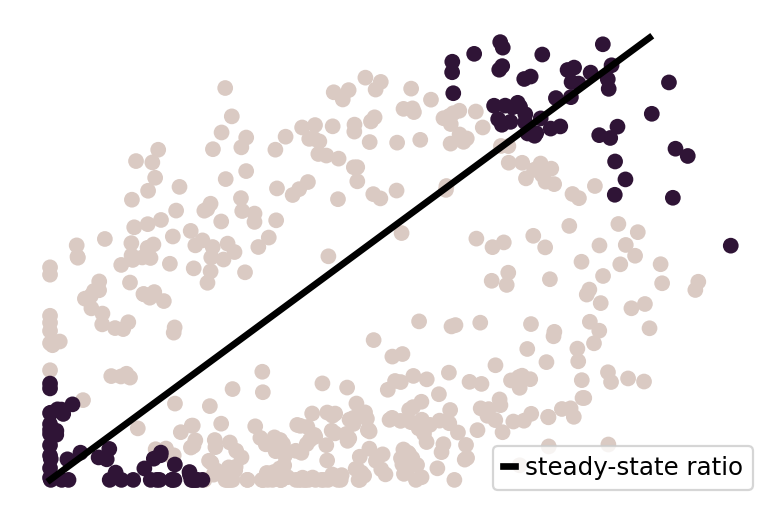

saving figure to file ./figures/scvelo_concept_2.png


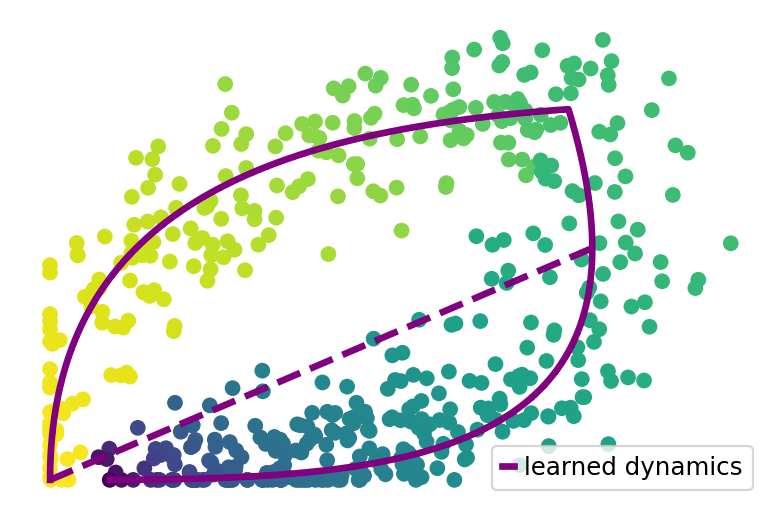

In [24]:
adata.obs['ss_weights'] = scv.utils.get_weight(adata[:, basis].layers['spliced'], 
                                               adata[:, basis].layers['unspliced'], perc=[10, 90]) * 1.01


scv.pl.scatter(adata, basis=basis, vkey='steady_state_velocity', color='ss_weights', 
               color_map='twilight_shifted', vmin=-0.5, vmax=0.4, **kwargs, save='1')
scv.pl.scatter(adata, basis=basis, vkey='dynamics', color='fit_t', color_map='viridis_r', **kwargs, save='2')

computing velocities
The correlation threshold has been reduced to -0.3586.
Please be cautious when interpreting results.
    finished (0:00:00)


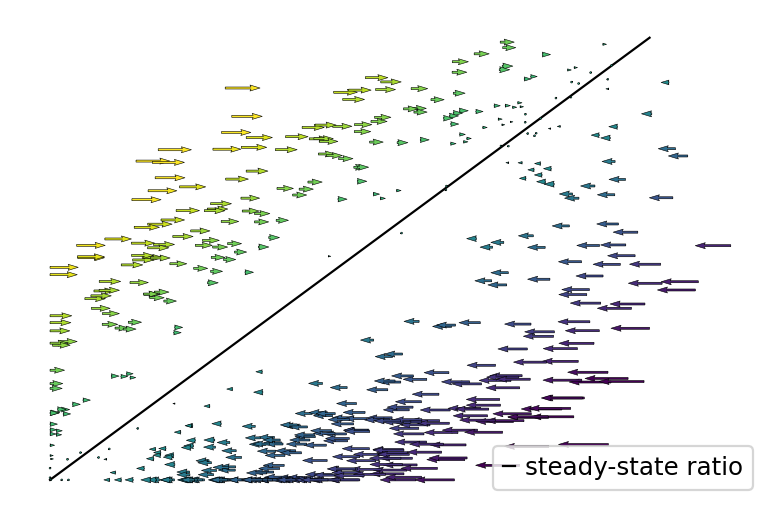

recovering dynamics (using 1/8 cores)
    finished (0:00:00)

outputs model fit of gene: 1
computing velocities
    finished (0:00:00)
saving figure to file ./figures/scvelo_concept_3.png


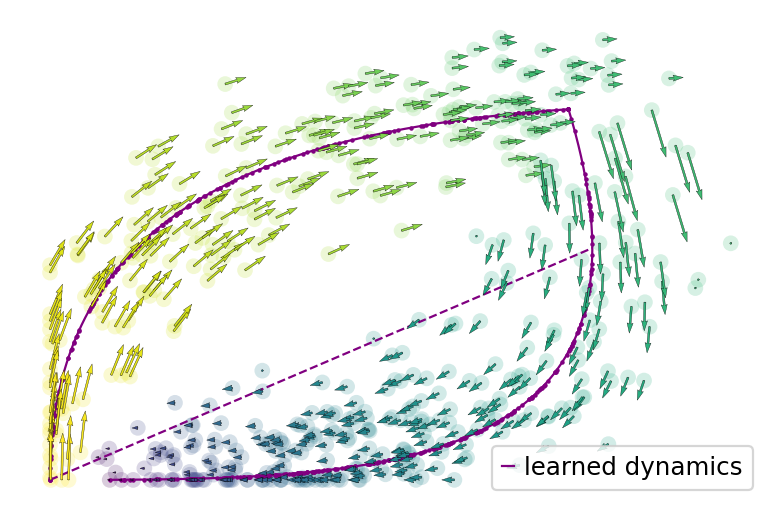

In [25]:
v_kwargs = {'vkey': 'steady_state_velocity', 'use_raw': True}
kwargs = {'size': 1, 'frameon': False, 'legend_loc': 'none', 'title': '', 'linewidth': .25, 'colorbar': False}

scv.tl.velocity(adata, mode='steady_state', **v_kwargs)
scv.pl.velocity_embedding(adata, basis=basis, color='steady_state_velocity', 
                          color_map='viridis', **v_kwargs, **kwargs)


dm = scv.tl.recover_dynamics(adata, var_names=basis, use_raw=True, max_iter=100)

scv.tl.velocity(adata, mode='dynamical', use_raw=True)

v_kwargs={'vkey': 'velocity', 'size': 200, 'frameon': False, 'title': '',
          'legend_loc': 'none', 'linewidth': .15, 'colorbar': False}


ax = scv.pl.scatter(adata, basis=basis, vkey='dynamics', size=1, use_raw=True, 
                    legend_loc='none', linewidth=1, show=False)

scv.pl.velocity_embedding(adata, basis=basis, color='fit_t', color_map='viridis_r', 
                          use_raw=True, **v_kwargs, ax=ax, save='3')

recovering dynamics (using 1/8 cores)
    finished (0:00:00)

outputs model fit of gene: 1
saving figure to file ./figures/scvelo_concept_5.png


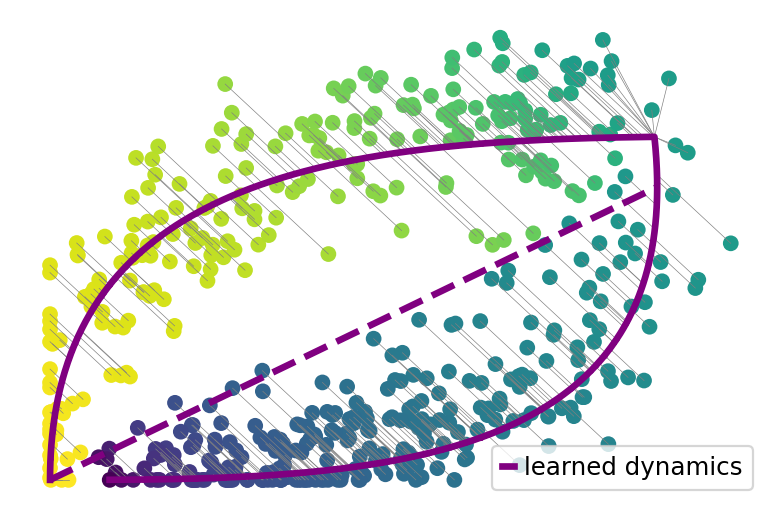

In [26]:
dm = scv.tl.recover_dynamics(adata, var_names=basis, max_iter=2, use_raw=True)

kwargs = {'fontsize': 18, 'size': 200, 'linewidth': 3, 'use_raw': True,
          'legend_loc': 'none', 'colorbar': False, 'frameon': False, 'title': ''}

scv.pl.scatter(adata, basis=basis, vkey='dynamics', color='fit_t', color_map='viridis_r', 
               show_assignments=True, **kwargs, save='5')

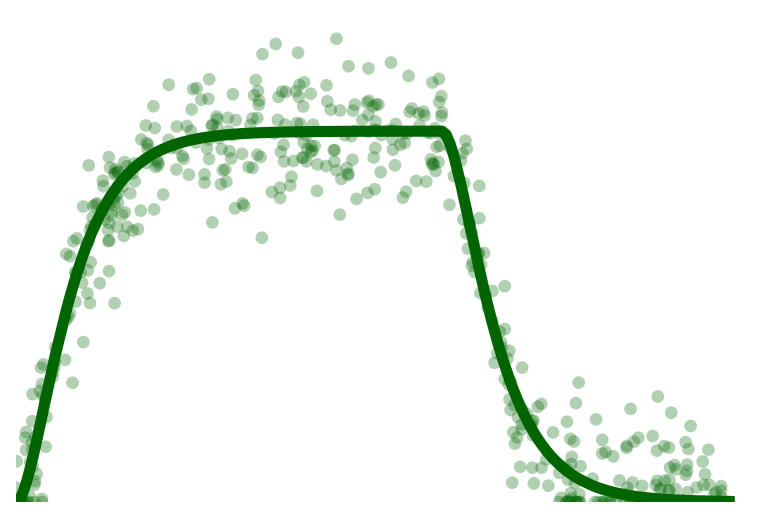

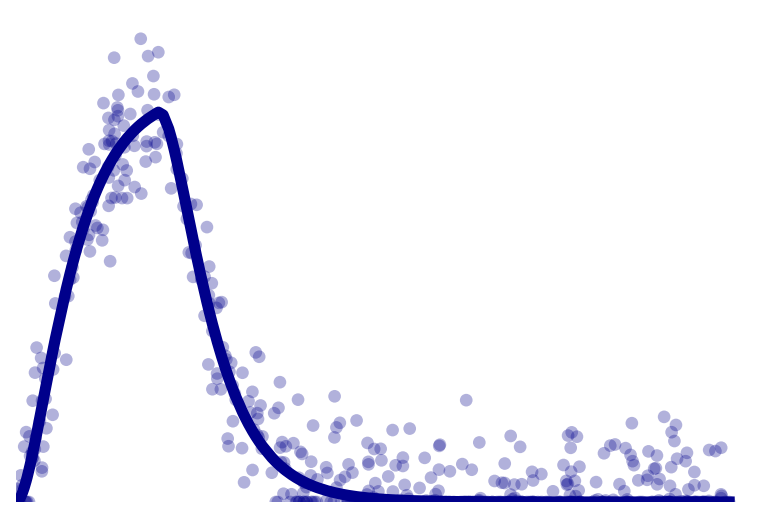

In [27]:
bdata = scv.datasets.simulation(n_obs=500, t_max=120, beta=.3, gamma=.15, switches=[.6, .2], noise_level=1)

sim_kwargs = {'ykey': 'spliced', 'linewidth': 5, 'legend_loc': 'none', 'frameon': False}
scv.pl.simulation(bdata, var_names=bdata.var_names[0], colors=['darkgreen'], **sim_kwargs)
scv.pl.simulation(bdata, var_names=bdata.var_names[1], colors=['darkblue'],  **sim_kwargs)

recovering dynamics (using 1/8 cores)
    finished (0:00:00)

outputs model fit of gene: 1


<AxesSubplot:xlabel='spliced', ylabel='unspliced'>

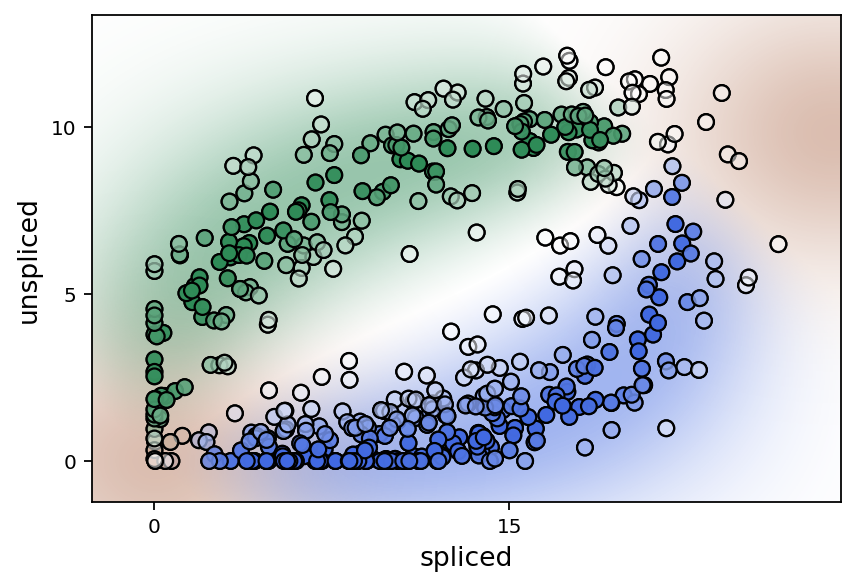

In [28]:
dm = scv.tl.recover_dynamics(adata, var_names=basis, use_raw=True)
dm.plot_state_likelihoods(continuous=True)